In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('C:/Users/I_am_AlexX/Downloads/Data_set_LOL/anime.csv')
df.shape

(17562, 35)

In [3]:
pd.set_option('display.max_columns',35)

In [4]:
df.head() 

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [5]:
df = df.replace('Unknown', float(0))

In [6]:
df.head(2)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",0.0,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0


In [7]:
df=df.drop(['MAL_ID', 'Name', 'Genres', 'English name', 'Japanese name',
       'Type', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],axis=1)

In [8]:
df.head()

,Score,Episodes,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,8.78,26,39,1251960,61971,105808,718161,71513,26678,329800
1,8.39,1,518,273145,1174,4143,208333,1935,770,57964
2,8.24,26,201,558913,12944,29113,343492,25465,13925,146918
3,7.27,26,1467,94683,587,4300,46165,5121,5378,33719
4,6.98,52,4369,13224,18,642,7314,766,1108,3394


In [9]:
df=df.astype(float)

In [10]:
df.shape

(17562, 10)

In [11]:
df = df[df.Score > 0.0]

In [12]:
df.isnull().sum() 

Score            0
Episodes         0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
dtype: int64

In [13]:
df.columns

Index(['Score', 'Episodes', 'Popularity', 'Members', 'Favorites', 'Watching',
       'Completed', 'On-Hold', 'Dropped', 'Plan to Watch'],
      dtype='object')

In [14]:
Y=df.Score

In [15]:
X=df.drop(['Score'],axis=1)

In [16]:
Y.head(2)

0    8.78
1    8.39
Name: Score, dtype: float64

In [17]:
X.head(2)

,Episodes,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,26.0,39.0,1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0
1,1.0,518.0,273145.0,1174.0,4143.0,208333.0,1935.0,770.0,57964.0


In [18]:
#sns.pairplot(df)

In [19]:
#X=X.replace('Unknown', float(0))

In [20]:
#Y=Y.replace('Unknown', float(0))

In [21]:
Y=Y.astype(float)

In [22]:
X=X.astype(float)

In [23]:
Y.shape

(12421,)

In [24]:
X.shape

(12421, 9)

## Regresión Ridge

In [25]:
lambdas= 10**np.linspace(10,2,100)*0.5

In [26]:
lambdas

array([5.00000000e+09, 4.15108784e+09, 3.44630605e+09, 2.86118383e+09,
       2.37540508e+09, 1.97210303e+09, 1.63727458e+09, 1.35929412e+09,
       1.12850986e+09, 9.36908711e+08, 7.77838072e+08, 6.45774833e+08,
       5.36133611e+08, 4.45107543e+08, 3.69536102e+08, 3.06795364e+08,
       2.54706901e+08, 2.11462144e+08, 1.75559587e+08, 1.45752653e+08,
       1.21006413e+08, 1.00461650e+08, 8.34050269e+07, 6.92443186e+07,
       5.74878498e+07, 4.77274228e+07, 3.96241449e+07, 3.28966612e+07,
       2.73113861e+07, 2.26743925e+07, 1.88246790e+07, 1.56285792e+07,
       1.29751211e+07, 1.07721735e+07, 8.94324765e+06, 7.42484131e+06,
       6.16423370e+06, 5.11765511e+06, 4.24876718e+06, 3.52740116e+06,
       2.92851041e+06, 2.43130079e+06, 2.01850863e+06, 1.67580133e+06,
       1.39127970e+06, 1.15506485e+06, 9.58955131e+05, 7.96141397e+05,
       6.60970574e+05, 5.48749383e+05, 4.55581378e+05, 3.78231664e+05,
       3.14014572e+05, 2.60700414e+05, 2.16438064e+05, 1.79690683e+05,
      

In [27]:
#len(np.linspace(10,2,100))

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [29]:
from sklearn.linear_model import Ridge, RidgeCV

In [30]:
ridge=Ridge(normalize=True)
coefs=[]

for k in lambdas:
    ridge.set_params(alpha=k)
    ridge.fit(X_train,Y_train)
    coefs.append(ridge.coef_)
    
print(np.shape(coefs))
coefs[0]

(100, 9)


array([ 3.51113926e-13, -3.21690407e-14,  4.70057666e-16,  8.34369370e-15,
        2.35096777e-15,  5.84004284e-16,  1.07710721e-14,  7.60929906e-15,
        3.02295598e-15])

In [31]:
lambdas.shape

(100,)

In [32]:
len(coefs)

100

Text(0, 0.5, 'beta')

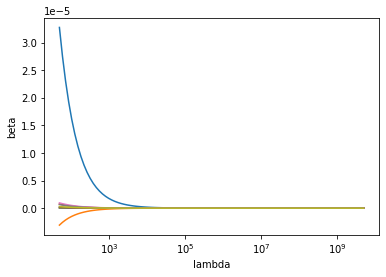

In [33]:
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('beta')

## Regresión Ridge con  $\lambda $=4

In [34]:
mod_ridge4 = Ridge(alpha =4, normalize = True)
mod_ridge4.fit(X_train, Y_train)
print(pd.Series(mod_ridge4.coef_ , index=X.columns))

Episodes         2.587288e-04
Popularity      -2.803694e-05
Members          2.397957e-07
Favorites        2.829336e-06
Watching         9.134462e-07
Completed        2.919388e-07
On-Hold          4.544562e-06
Dropped          1.801416e-06
Plan to Watch    1.879681e-06
dtype: float64


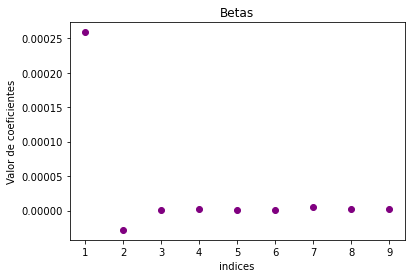

In [35]:
eje_X = range(1,len(mod_ridge4.coef_)+1,1)
plt.scatter(eje_X, mod_ridge4.coef_, color='purple')
plt.title('Betas')
plt.xlabel('indices')
plt.ylabel('Valor de coeficientes')
plt.show()

In [36]:
Y_pred = mod_ridge4.predict(X_test)

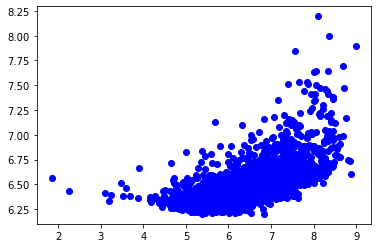

In [37]:
plt.scatter(Y_test, Y_pred, color='blue')

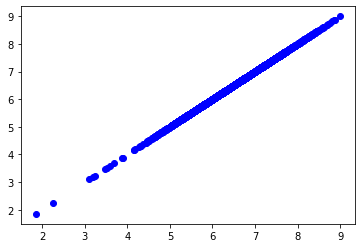

In [38]:
plt.scatter(Y_test, Y_test, color='blue')

In [39]:
ECM0=round(mean_squared_error(Y_test,Y_pred),3)
print(ECM0)

0.577


In [40]:
# Cálculo de $R^2$ ajustada
r_2=r2_score(Y_test,Y_pred)
print('R^2=',round(r_2,3))
n=len(Y_train)
p=X_train.shape[1]
r_2_adj=1-(((1-r_2)*(n-1))/(n-p-1))
print('R^2_adj=',round(r_2_adj,3))

R^2= 0.241
R^2_adj= 0.24


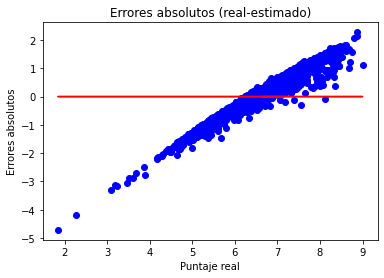

In [41]:
#Cálculo de los errores absolutos (real-estimado) y gráficas

err_abs = Y_test-Y_pred

plt.scatter(Y_test, err_abs, color='blue')
plt.plot(Y_test, np.zeros(len(err_abs)),color='red')
plt.title("Errores absolutos (real-estimado)")
plt.xlabel("Puntaje real")
plt.ylabel("Errores absolutos")
plt.show()

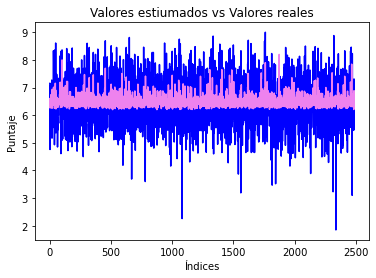

In [42]:
# Gráfica de valores estimados vs valores reales
eje_X= range(1,len(Y_test)+1)
plt.plot(eje_X,Y_test,color='blue')
plt.plot(eje_X,Y_pred,color='violet')
plt.title("Valores estiumados vs Valores reales")
plt.xlabel("Índices")
plt.ylabel("Puntaje")
plt.show()

En este caso $\lambda =0$ por lo que no importa el valor que le demos a los coeficientes, pues al multiplicarse por $\lambda$ sus valores se anulan.

In [43]:
mod_ridge0 = Ridge(alpha =0, normalize = True)
mod_ridge0.fit(X_train, Y_train)
print(pd.Series(mod_ridge0.coef_ , index=X.columns))

Episodes         1.291739e-03
Popularity      -1.511535e-04
Members         -3.798501e-07
Favorites       -7.692250e-06
Watching         1.648483e-06
Completed        1.283789e-06
On-Hold          6.052695e-05
Dropped         -6.937025e-05
Plan to Watch    2.968361e-06
dtype: float64


D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.40411e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


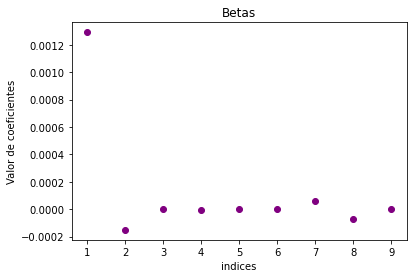

In [44]:
eje_X = range(1,len(mod_ridge0.coef_)+1,1)
plt.scatter(eje_X, mod_ridge0.coef_, color='purple')
plt.title('Betas')
plt.xlabel('indices')
plt.ylabel('Valor de coeficientes')
plt.show()

In [45]:
Y_pred = mod_ridge0.predict(X_test)

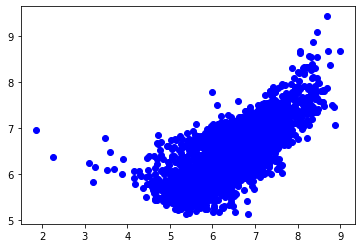

In [46]:
plt.scatter(Y_test, Y_pred, color='blue')

In [47]:
ECM0=round(mean_squared_error(Y_test,Y_pred),3)
print(ECM0)

0.348


In [48]:
# Cálculo de $R^2$ ajustada
r_2=r2_score(Y_test,Y_pred)
print('R^2=',round(r_2,3))
n=len(Y_train)
p=X_train.shape[1]
r_2_adj=1-(((1-r_2)*(n-1))/(n-p-1))
print('R^2_adj=',round(r_2_adj,3))

R^2= 0.542
R^2_adj= 0.542


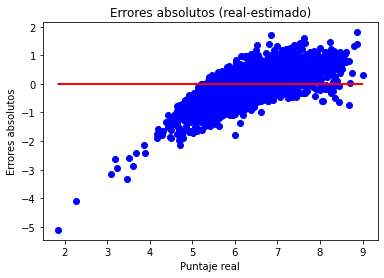

In [49]:
#Cálculo de los errores absolutos (real-estimado) y gráficas

err_abs = Y_test-Y_pred

plt.scatter(Y_test, err_abs, color='blue')
plt.plot(Y_test, np.zeros(len(err_abs)),color='red')
plt.title("Errores absolutos (real-estimado)")
plt.xlabel("Puntaje real")
plt.ylabel("Errores absolutos")
plt.show()

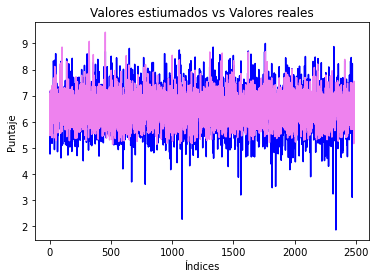

In [50]:
# Gráfica de valores estimados vs valores reales
eje_X= range(1,len(Y_test)+1)
plt.plot(eje_X,Y_test,color='blue')
plt.plot(eje_X,Y_pred,color='violet')
plt.title("Valores estiumados vs Valores reales")
plt.xlabel("Índices")
plt.ylabel("Puntaje")
plt.show()

## $\lambda$ definida con cross-validation

In [51]:
# Proporcionamos como parámetro el vector con los diferentes valores de lambda para que se elija el mejor con "cross validation"
ridgecv=RidgeCV(alphas=lambdas, scoring='neg_mean_squared_error',normalize=True)
ridgecv.fit(X_train,Y_train)
print('El valor de lambda con cross validation es:' ,round(ridgecv.alpha_,3))

El valor de lambda con cross validation es: 50.0


In [52]:
ridgecv.alpha_ in lambdas

True

In [53]:
# Se muestran los valores de los coeficientes por pantalla
mod_ridgeCV = Ridge(alpha=ridgecv.alpha_, normalize = True)
mod_ridgeCV.fit(X_train,Y_train)
print(pd.Series(mod_ridgeCV.coef_, index = X.columns))

Episodes         3.274603e-05
Popularity      -3.078774e-06
Members          4.224015e-08
Favorites        7.234785e-07
Watching         2.058485e-07
Completed        5.240203e-08
On-Hold          9.505743e-07
Dropped          6.521502e-07
Plan to Watch    2.771085e-07
dtype: float64


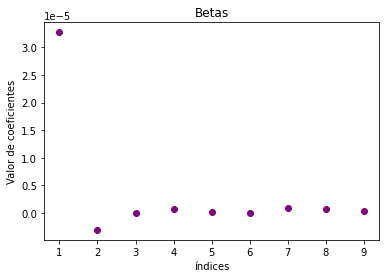

In [54]:
# Se grafican los valores de los coeficientes (betas).
eje_X= range(1,len(mod_ridgeCV.coef_)+1,1)
plt.scatter(eje_X, mod_ridgeCV.coef_, color = 'purple')
plt.title('Betas')
plt.xlabel('índices')
plt.ylabel('Valor de coeficientes')
plt.show()

In [55]:
#Predicción
#Se hacen als predicciones con X_test
Y_pred = mod_ridgeCV.predict(X_test)

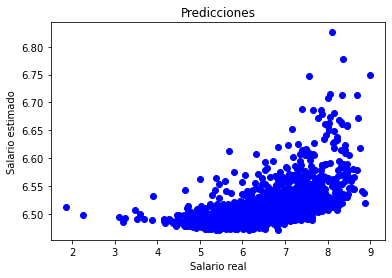

In [56]:
plt.scatter(Y_test, Y_pred,color='blue')
plt.title('Predicciones')
plt.xlabel('Salario real')
plt.ylabel('Salario estimado')
plt.show()

In [57]:
ECMcv=round(mean_squared_error(Y_test,Y_pred),3)
print(ECMcv)

0.729


In [58]:
# Cálculo de $R^2$ ajustada
r_2=r2_score(Y_test,Y_pred)
print('R^2=',round(r_2,3))
n=len(Y_train)
p=X_train.shape[1]
r_2_adj=1-(((1-r_2)*(n-1))/(n-p-1))
print('R^2_adj=',round(r_2_adj,3))

R^2= 0.04
R^2_adj= 0.039


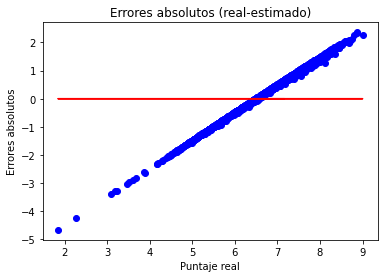

In [59]:
#Cálculo de los errores absolutos (real-estimado) y gráficas

err_abs = Y_test-Y_pred

plt.scatter(Y_test, err_abs, color='blue')
plt.plot(Y_test, np.zeros(len(err_abs)),color='red')
plt.title("Errores absolutos (real-estimado)")
plt.xlabel("Puntaje real")
plt.ylabel("Errores absolutos")
plt.show()

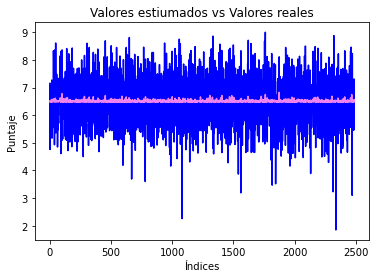

In [60]:
# Gráfica de valores estimados vs valores reales
eje_X= range(1,len(Y_test)+1)
plt.plot(eje_X,Y_test,color='blue')
plt.plot(eje_X,Y_pred,color='violet')
plt.title("Valores estiumados vs Valores reales")
plt.xlabel("Índices")
plt.ylabel("Puntaje")
plt.show()